# Progetto Big Data La Barbera - Drago

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, impute
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import csv
from scipy.stats import norm
from scipy import stats

plt.style.use('ggplot')

print("### Librerie importate con successo ###")

### Librerie importate con successo ###


### Data Collection 

In [2]:
# importo il dataframe di training
df_train = pd.read_csv('docs/train.csv')

# importo il dataset di test
df_test = pd.read_csv('docs/test.csv')

# memorizzo un array con i nomi delle features 

features_train = df_train.columns
features_test = df_test.columns

diff = features_train.difference(features_test)[0]
print( diff)

# abbiamo confrontato i campi del test set e del training set 
# per accertarci che l'unica feature mancante in quello di test rispetto a quello di training fosse : "SalePrice"
#  ovvero ciò che dobbiamo predire 

df_train[diff].describe()



SalePrice


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Data Preprocessing

### Remove Duplicates

In [3]:
duplicates_cols = df_train.columns.difference(['Id'])

df_train.drop_duplicates(duplicates_cols)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Sales Histogram

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


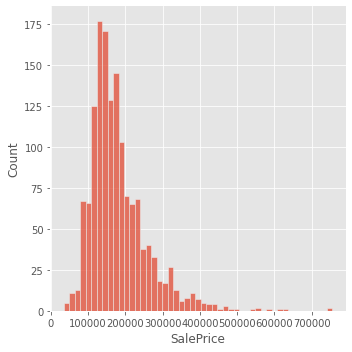

In [4]:
sns.displot(df_train['SalePrice'])
print(f"Skewness : {df_train['SalePrice'].skew()}")
print(f"Kurtosis : {df_train['SalePrice'].kurt()}")

### Categorical to Numerical Features 

In [5]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# elimino i campi numerici dal dataset e rimango con le sole features categoriche 
categorical = df_train.select_dtypes(exclude='int64')
categorical = categorical.select_dtypes(exclude='float64')
categorical.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [7]:
values = {}
for c in categorical : 
  values[c]=list(df_train[c].unique())
values

{'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH'],
 'Street': ['Pave', 'Grvl'],
 'Alley': [nan, 'Grvl', 'Pave'],
 'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
 'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'],
 'Utilities': ['AllPub', 'NoSeWa'],
 'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
 'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'Neighborhood': ['CollgCr',
  'Veenker',
  'Crawfor',
  'NoRidge',
  'Mitchel',
  'Somerst',
  'NWAmes',
  'OldTown',
  'BrkSide',
  'Sawyer',
  'NridgHt',
  'NAmes',
  'SawyerW',
  'IDOTRR',
  'MeadowV',
  'Edwards',
  'Timber',
  'Gilbert',
  'StoneBr',
  'ClearCr',
  'NPkVill',
  'Blmngtn',
  'BrDale',
  'SWISU',
  'Blueste'],
 'Condition1': ['Norm',
  'Feedr',
  'PosN',
  'Artery',
  'RRAe',
  'RRNn',
  'RRAn',
  'PosA',
  'RRNe'],
 'Condition2': ['Norm',
  'Artery',
  'RRNn',
  'Feedr',
  'PosN',
  'PosA',
  'RRAn',
  'RRAe'],
 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
 'HouseStyle': ['2Story',
  '1Story',
  '1.5Fin',
  '1.5Unf',
  

In [8]:

# coversione da categorica a numerica 
categorical_to_numerical = {
    'Street': {'Pave': 2, 'Grvl': 1},
    'Alley': {'Pave': 2, 'Grvl': 1}, 
    'LotShape': {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0},
    'LandContour': {'Lvl':3, 'Bnk':2, 'HLS':1, 'Low':0},
    'Utilities': {"AllPub": 4, "NoSewr": 3, "NoSeWa":2, "ELO": 1}, 
    'LandSlope': {"Gtl": 3, "Mod": 2, "Sev": 1},
    "ExterQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "ExterCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "BsmtQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "BsmtCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "BsmtExposure": {"Gd":4, "Av":3, "Mn":2, "No":1}, 
    "BsmtFinType1": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1}, 
    "BsmtFinType2": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1}, 
    "HeatingQC": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "CentralAir": {"Y":1, "N":0},
    "Electrical": {"SBrkr":5, "FuseA":4, "FuseF":3, "FuseP":2, "Mix":1}, 
    "KitchenQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "Functional": {"Typ":8, "Min1":7, "Min2":6, "Mod":5, "Maj1":4, "Maj2":3, "Sev":2, "Sal":1}, 
    "FireplaceQu": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "GarageFinish": {"Fin":3, "RFn":2, "Unf":1}, 
    "GarageQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}, 
    "GarageCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "PavedDrive": {"Y":2, "P":1, "N":0},
    "PoolQC":  {"Ex":4, "Gd":3, "TA":2, "Fa":1}, 
}


new_num_columns = list(categorical_to_numerical.keys())
X = df_train.copy()
X[new_num_columns] = X[new_num_columns].fillna(0)
X1 = X.replace(categorical_to_numerical)
X1.info()

Y = df_test.copy()
Y[new_num_columns] = Y[new_num_columns].fillna(0)
Y1 = Y.replace(categorical_to_numerical)
Y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
new_categorical = X1.select_dtypes(exclude='int64')
new_categorical = new_categorical.select_dtypes(exclude='float64')
columns_categorical = new_categorical.columns
print(columns_categorical, '--------->  ' f'tot : {columns_categorical.size}') # sono le feature che dopo la trasformazione son comunque rimaste di tipo categorico 

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object') --------->  tot : 19


### Feature Selection

Attraverso il metodo describe abbiamo potuto appurare come il 75% degli immobili ricade al di sotto di 21400. Nell'ottica di volersi spostare momentanemante su un problema di classificazione per fasce di prezzo, rispetto ad un problema di regressione, questo dato ci permette di creare un'ulteriore informazione su come gestire le fasce di prezzo per la creazione delle lables. Essendo il dataset sbilanciato, creeremo delle fasce di prezzo più fitte e sottili al di sotto della soglia del percentile 75%, mentre nella restante parte avremo delle lables più larghe.

#### Correlation with categorical features

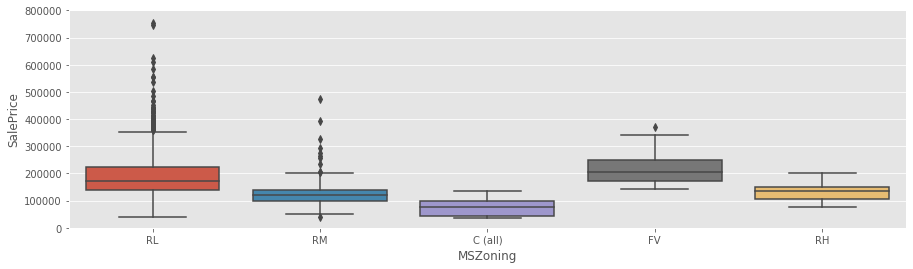

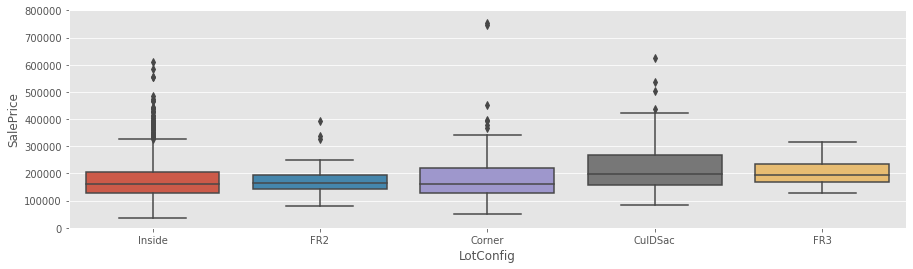

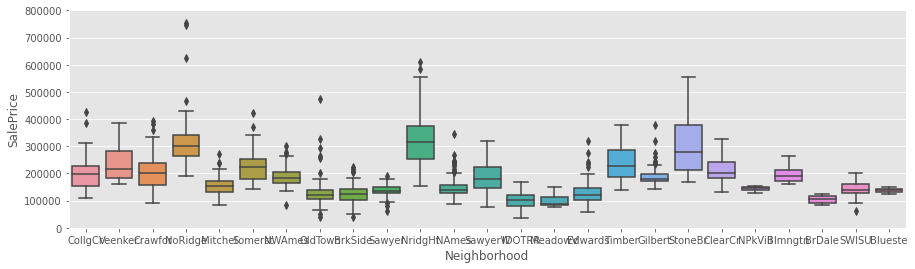

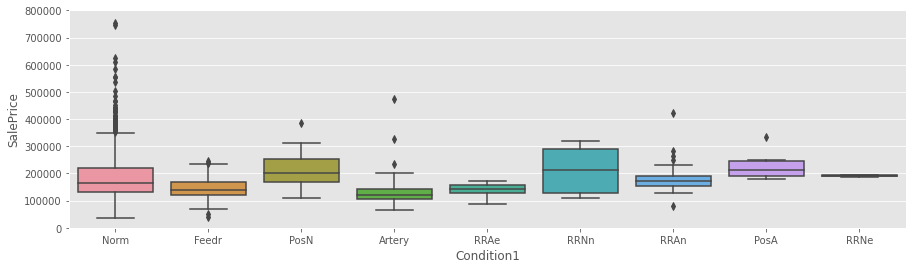

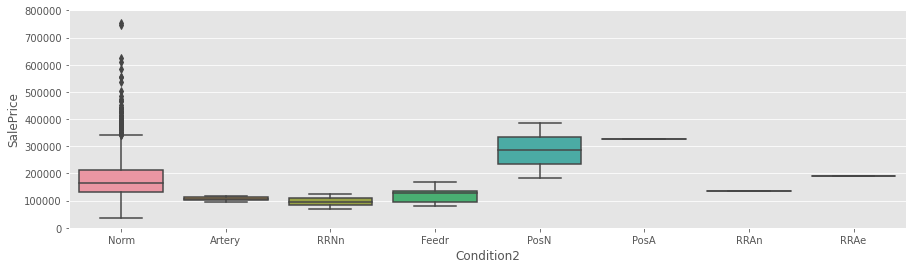

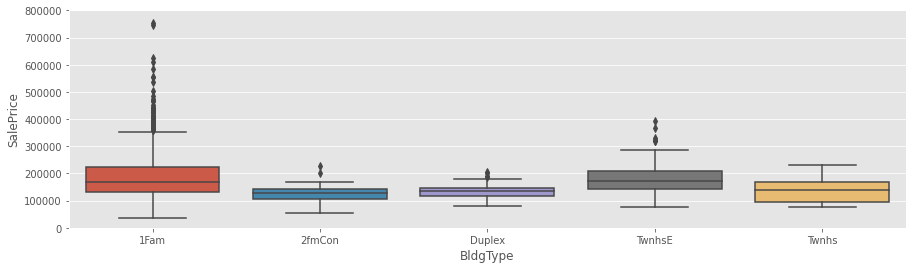

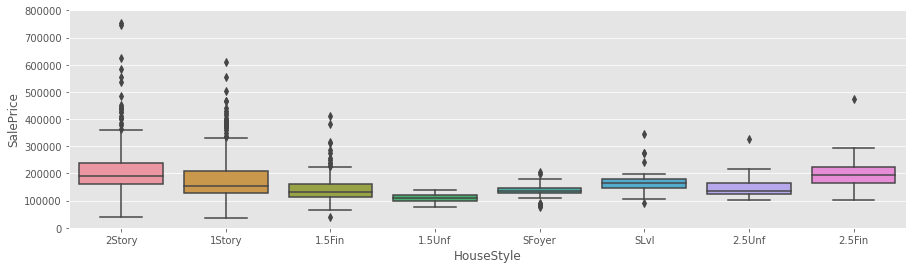

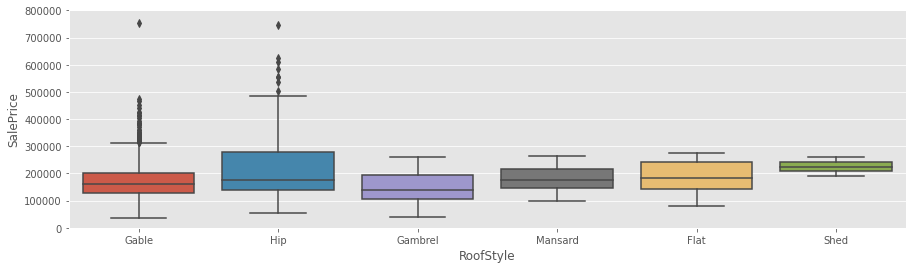

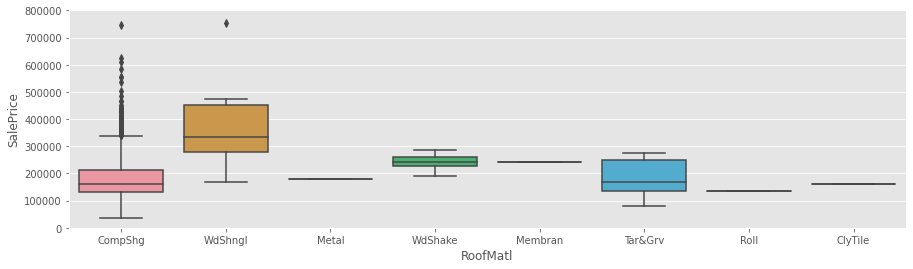

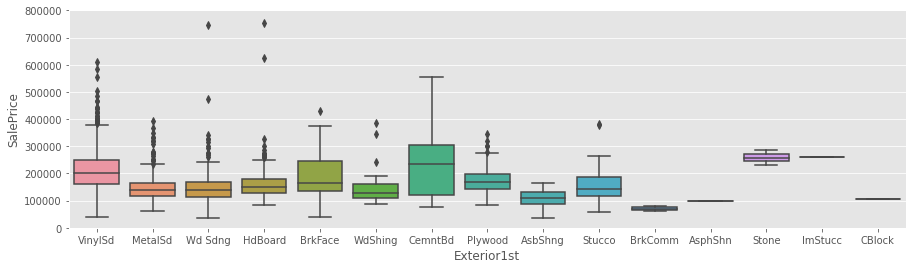

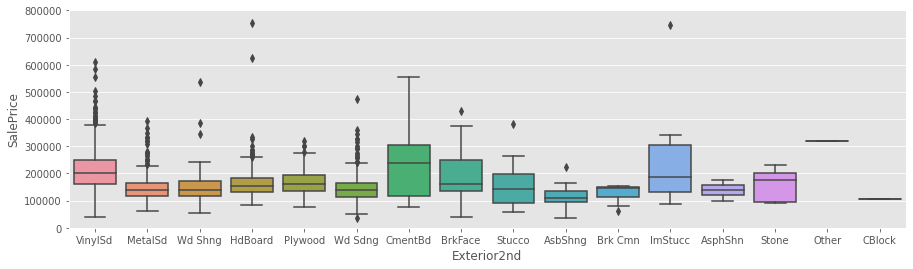

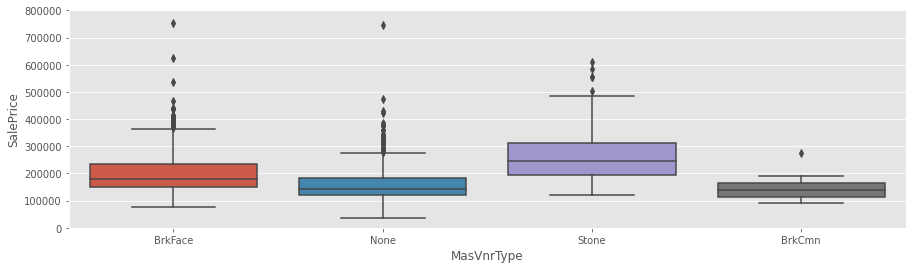

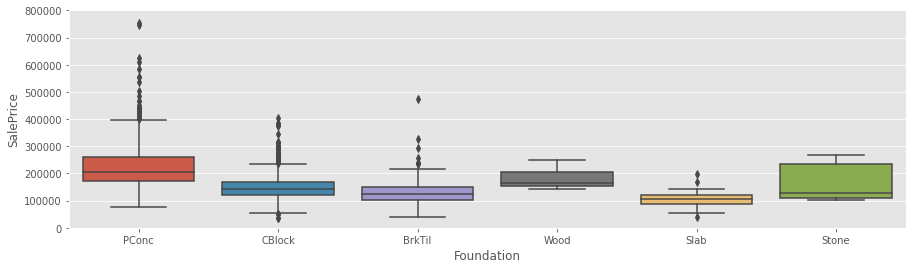

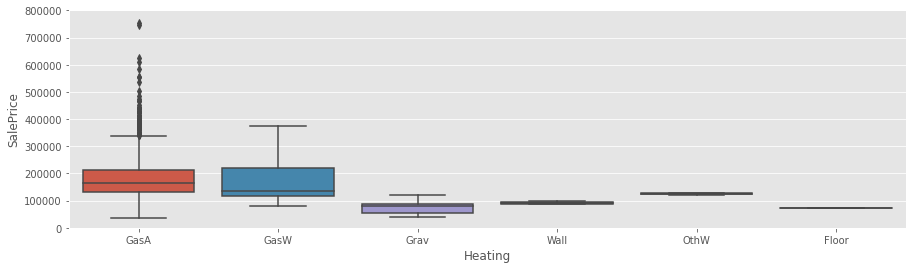

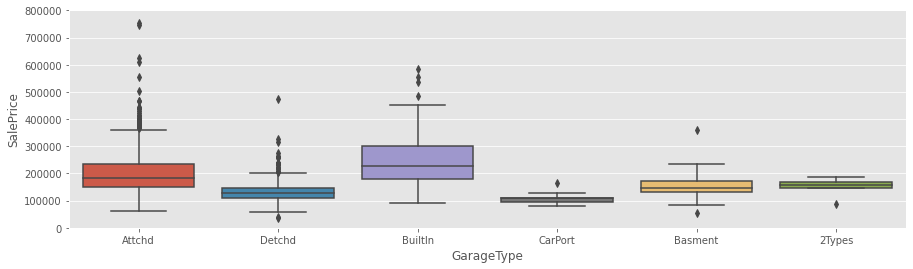

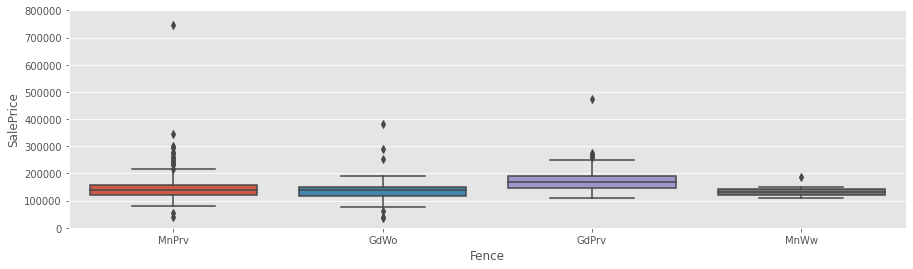

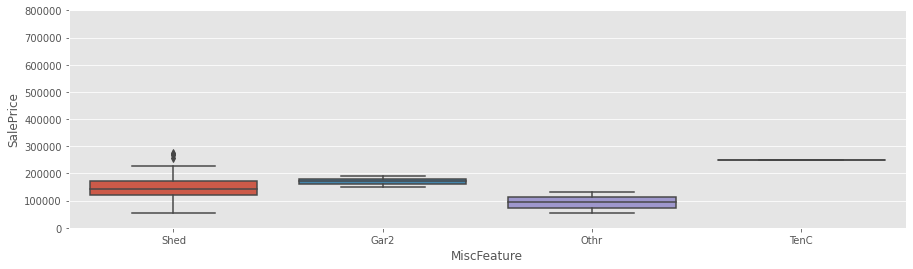

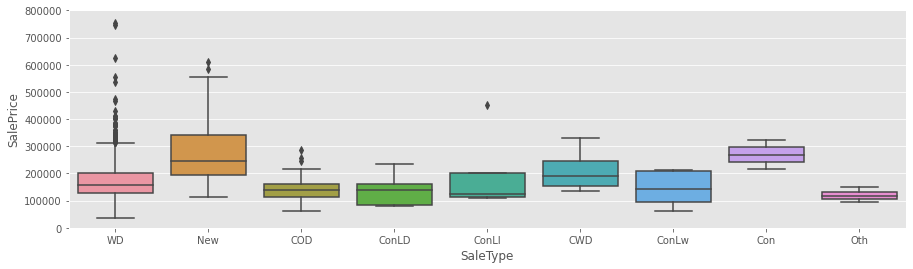

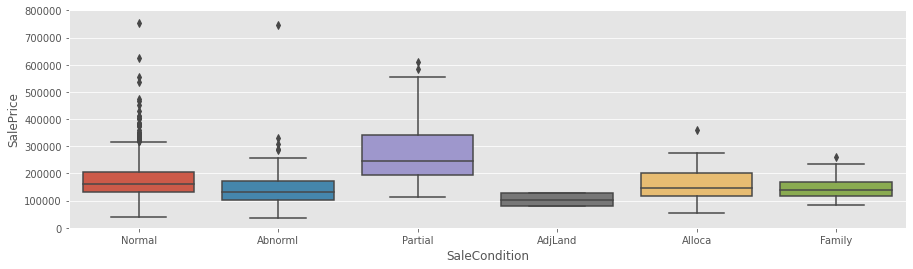

In [10]:
for var in columns_categorical:
    data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
    f, ax =plt.subplots(figsize=(15,4))
    fig = sns.boxplot(x=var, y ='SalePrice', data=data)
    fig.axis(ymin=0, ymax=800000)
    

#### Correlation Matrix

81


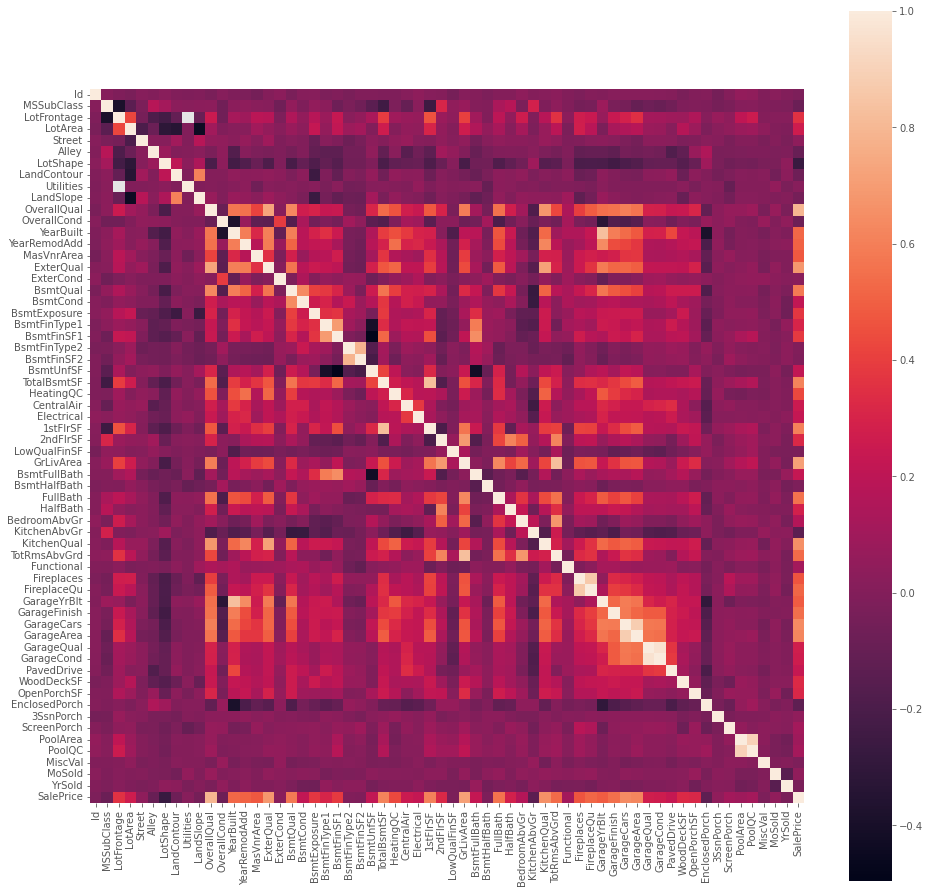

In [11]:
corrmat = X1.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=1, square= True,)
print(X1.columns.size)

#### Zoommed Heatmap

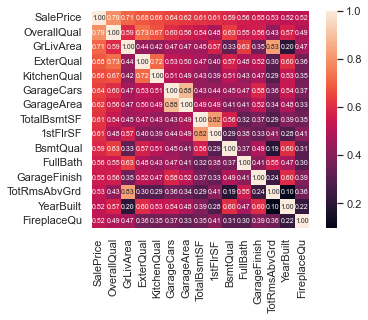

In [12]:
k = 15 # numero di variabili per la heatmap 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(X1[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':7},yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Cleaning and Anomaly Value Detections

#### Comparing Train and Test

In [78]:
# se non si possiede installare la libreria jinja2  cmd : ' pip install jinja2 '
pd.concat([X1.isna().sum().rename('train'), Y1.isna().sum().rename('test')], axis=1)\
    .astype('float')\
        .sort_values(['train', 'test'], ascending = False)\
            .style.background_gradient(vmin=0, vmax=max([X1.shape[0], Y1.shape[0]]))

,train,test
MiscFeature,1388.000000,1408.000000
Fence,1164.000000,1169.000000
LotFrontage,257.000000,227.000000
GarageYrBlt,81.000000,78.000000
GarageType,81.000000,76.000000
MasVnrType,8.000000,16.000000
MasVnrArea,8.000000,15.000000
MSZoning,0.000000,4.000000
BsmtFullBath,0.000000,2.000000
BsmtHalfBath,0.000000,2.000000


#### Scatter Plots

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

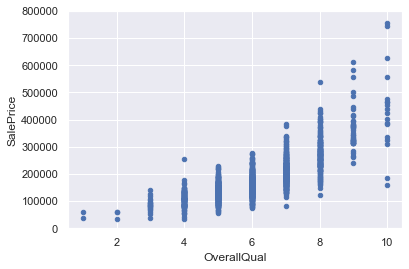

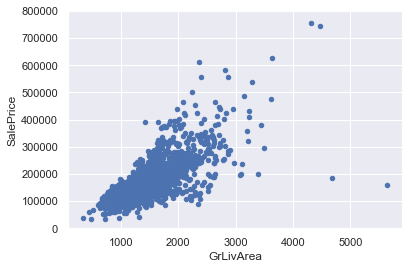

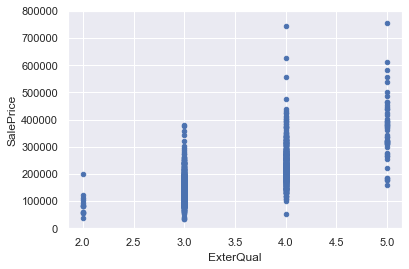

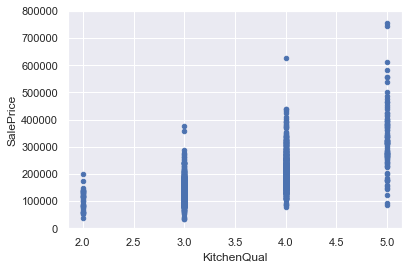

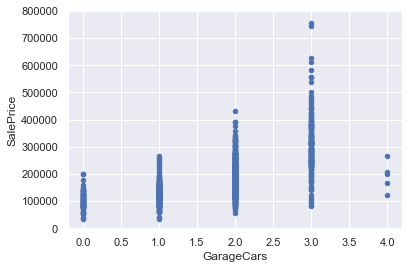

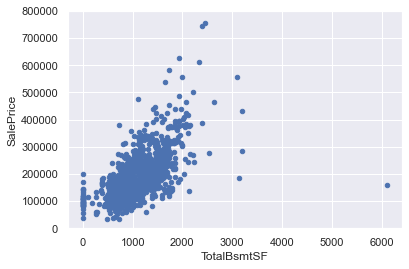

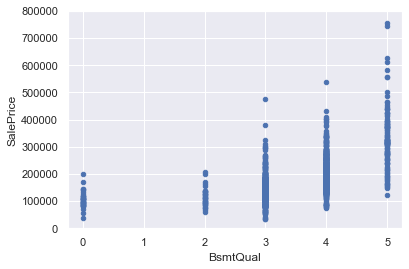

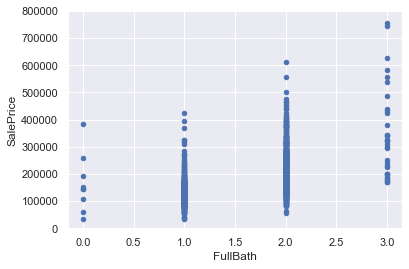

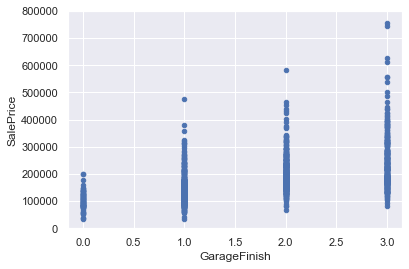

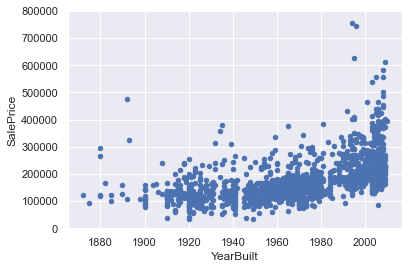

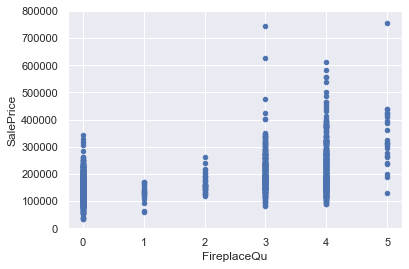

In [14]:
feature_columns = list()
for c in cols:
    if c not in ['SalePrice','TotRmsAbvGrd', 'GarageArea' ,'1stFlrSF']: # sono le features che hanno una correlazione >= a 0.8 con altre features 
        feature_columns.append(c)

    
for var in feature_columns:
    data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
    data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

### Removing anomaly values

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

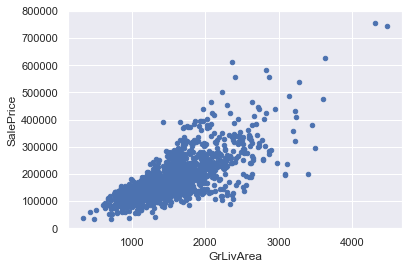

In [15]:

temp =X1[X1['GrLivArea']>4500].index 
temp2 = X1[X1['SalePrice']<200000].index

dropped = temp.intersection(temp2)
for x in dropped :
    X1= X1.drop(x)
 
var = 'GrLivArea'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([457, 769], dtype='int64')


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

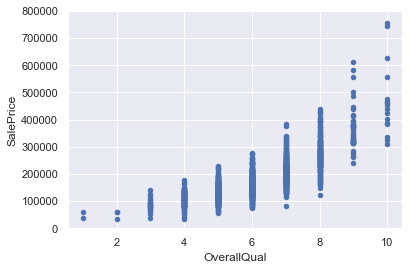

In [16]:
temp =X1[X1['OverallQual']==4].index
temp2 = X1[X1['SalePrice']>200000].index
dropped = temp.intersection(temp2)


temp=(X1[X1['OverallQual']==8].index)
temp2=(X1[X1['SalePrice']>500000].index)
dropped = dropped.union(temp.intersection(temp2))

temp=(X1[X1['OverallQual']==10].index)
temp2=(X1[X1['SalePrice']<200000].index)
dropped = dropped.union(temp.intersection(temp2))
print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'OverallQual'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([1169, 1182], dtype='int64')


<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

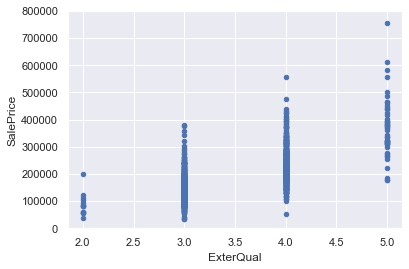

In [17]:
### ExterQual
temp =X1[X1['ExterQual']==4.0].index
temp2 = X1[X1['SalePrice']>600000].index
dropped = temp.intersection(temp2)

print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'ExterQual'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

Int64Index([313, 608, 691], dtype='int64')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

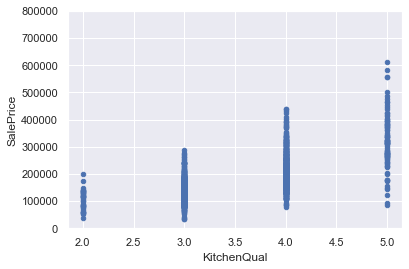

In [18]:
# KitchenQual

temp =X1[X1['KitchenQual']==3.0].index
temp2 = X1[X1['SalePrice']>300000].index
dropped = temp.intersection(temp2)

temp =X1[X1['KitchenQual']==4.0].index
temp2 = X1[X1['SalePrice']>600000].index
dropped= dropped.union(temp.intersection(temp2))

temp =X1[X1['KitchenQual']==5.0].index
temp2 = X1[X1['SalePrice']>700000].index
dropped= dropped.union(temp.intersection(temp2))

print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'KitchenQual'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([420, 747, 1190, 1340, 1350], dtype='int64')


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

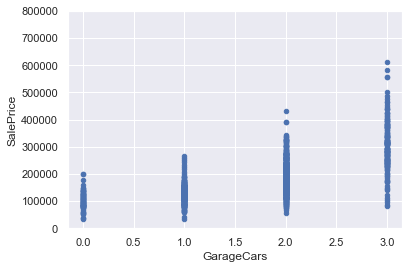

In [19]:
# GarageCars

temp =X1[X1['GarageCars']==4.0].index

dropped = temp


print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'GarageCars'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([], dtype='int64')


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

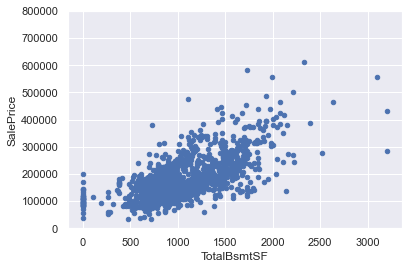

In [20]:
# TotalBsmtSF
temp =X1[X1['TotalBsmtSF']>6000].index

dropped = temp


print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'TotalBsmtSF'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([53], dtype='int64')


<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

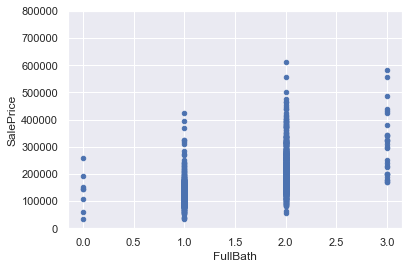

In [21]:
# FullBath

temp =X1[X1['FullBath']==0.0].index
temp2 = X1[X1['SalePrice']>300000].index
dropped = temp.intersection(temp2)


print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'FullBath'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

Int64Index([185, 304, 583], dtype='int64')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

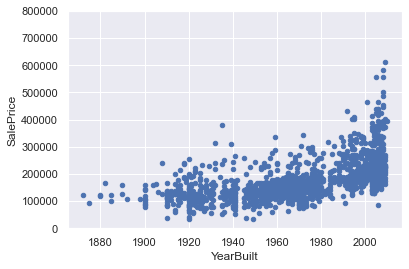

In [22]:
# YearBuilt
temp =X1[X1['YearBuilt']<1900].index
temp2 = X1[X1['SalePrice']>200000].index
dropped = temp.intersection(temp2)

temp =X1[X1['YearBuilt']>1980].index
temp2 = X1[X1['SalePrice']>700000].index
dropped = dropped.union(temp.intersection(temp2))

print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'YearBuilt'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Int64Index([], dtype='int64')


<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

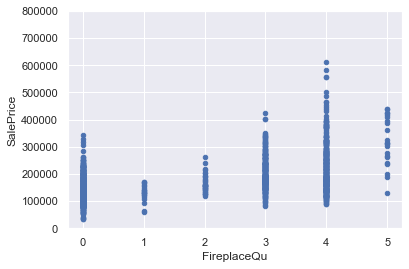

In [23]:
# FireplaceQu

temp =X1[X1['FireplaceQu']==3].index
temp2 = X1[X1['SalePrice']>600000].index
dropped = temp.intersection(temp2)

temp =X1[X1['FireplaceQu']==5].index
temp2 = X1[X1['SalePrice']>700000].index
dropped = dropped.union(temp.intersection(temp2))

print(dropped)

for x in dropped :
    X1= X1.drop(x)
 
var = 'FireplaceQu'
data = pd.concat([X1['SalePrice'],X1[var]],axis =1)
data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

#### Normalizzazione delle features rilevanti


##### spiegazione

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


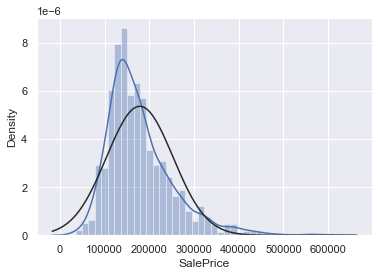

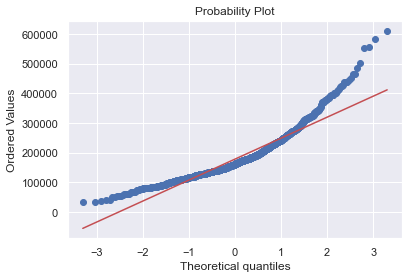

In [24]:
#histogram and normal probability plot
sns.distplot(X1['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(X1['SalePrice'], plot=plt)

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


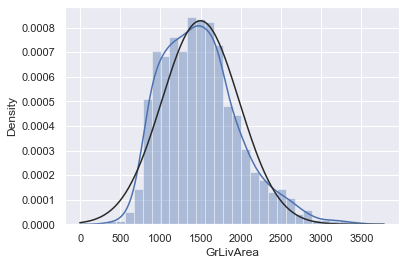

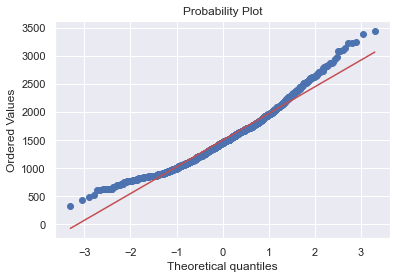

In [25]:
#histogram and normal probability plot
sns.distplot(X1['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(X1['GrLivArea'], plot=plt)

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


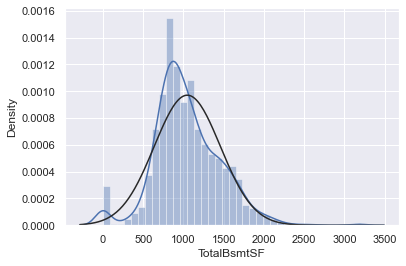

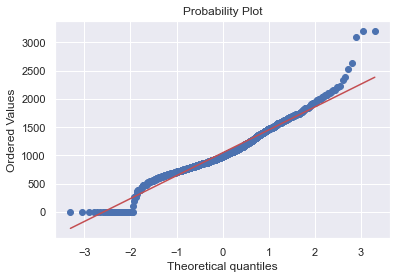

In [26]:
#histogram and normal probability plot
sns.distplot(X1['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(X1['TotalBsmtSF'], plot=plt)

#### normalizzazione delle variabili 

In [27]:
#applying log transformation
X1['SalePrice'] = np.log(X1['SalePrice'])

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


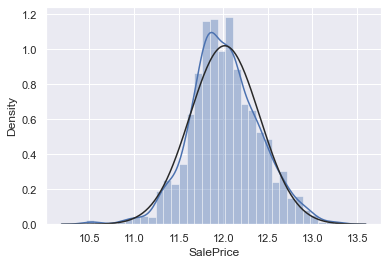

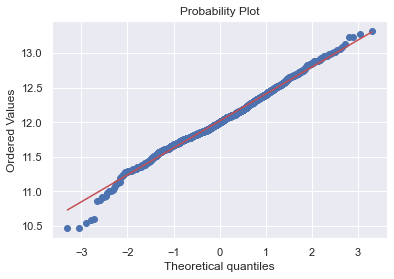

In [28]:
#histogram and normal probability plot (nomalized)
sns.distplot(X1['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(X1['SalePrice'], plot=plt)

In [29]:
#applying log transformation
X1['GrLivArea'] = np.log(X1['GrLivArea'])
Y1['GrLivArea'] = np.log(Y1['GrLivArea'])

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


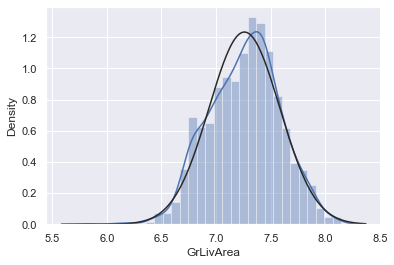

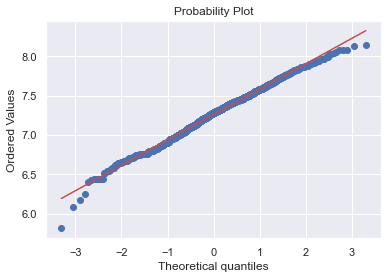

In [30]:
#histogram and normal probability plot (nomalized)
sns.distplot(X1['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(X1['GrLivArea'], plot=plt)

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


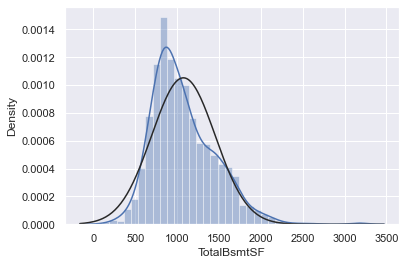

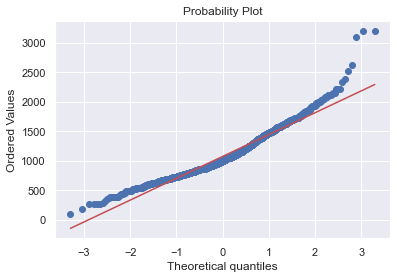

In [31]:
sns.distplot(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'], plot=plt)

In [32]:
X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'])
Y1.loc[Y1['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(Y1.loc[Y1['TotalBsmtSF']>0,'TotalBsmtSF'])

c:\Users\Salvatore Drago\Desktop\envpy\tutorial-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


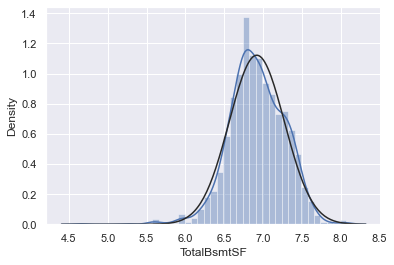

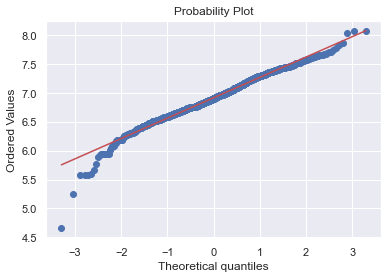

In [33]:
#histogram and normal probability plot (normalized)
sns.distplot(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(X1.loc[X1['TotalBsmtSF']>0,'TotalBsmtSF'], plot=plt)

## Models

In [34]:
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer



In [117]:
y= X1.SalePrice
X_train, X_val, y_train, y_val = train_test_split(X1[feature_columns], y, test_size = 0.3, random_state = 0)
#X_train, X_val, y_train, y_val = train_test_split(X1, y, test_size = 0.3, random_state = 0)
X_train_rdg, X_val_rdg, y_train_rdg, y_val_rdg = train_test_split(X1, y, test_size = 0.3, random_state = 0)

print("X_train : " + str(X_train.shape))
print("X_val : " + str(X_val.shape))
print("y_train : " + str(y_train.shape))
print("y_val: " + str(y_val.shape))
X_val

X_train : (1009, 11)
X_val : (433, 11)
y_train : (1009,)
y_val: (433,)


,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,TotalBsmtSF,BsmtQual,FullBath,GarageFinish,YearBuilt,FireplaceQu
1450,5,7.491088,3,3,0,6.797940,4,2,0,1974,0
598,5,7.406711,3,4,2,7.265430,4,2,3,1977,3
1255,6,7.220374,3,3,1,6.784457,3,1,1,1931,4
368,5,7.145196,3,3,1,7.145196,3,1,3,1954,4
437,6,6.806829,4,3,1,6.784457,3,1,1,1926,0
...,...,...,...,...,...,...,...,...,...,...,...
1108,6,7.432484,3,3,2,6.828712,4,2,2,2000,3
1036,9,7.390181,4,5,3,7.390181,5,2,3,2007,5
802,7,7.283448,4,4,2,6.590301,4,2,3,2005,4
507,6,7.104965,4,4,2,7.104965,4,2,3,2009,0


In [93]:
#
def rmse(y_actual, y_predicted):
    rmse= mean_squared_error(y_actual, y_predicted, squared=False)
    return rmse



In [81]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)


def rmse_cv_train(model):
    rmse_train= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv=10)).mean()
    return rmse_train

        
        

def rmse_cv_val(model):
    rmse_val= np.sqrt(-cross_val_score(model, X_val, y_val, scoring = scorer, cv=10)).mean()
    return rmse_val

#### Regressore Lineare senza regolarizzazione

In [118]:
# Linear Regression
lr = LinearRegression()
#Look at predictions on training and validation set
print("RMSE on Training set with cross val:", rmse_cv_train(lr))
print("RMSE on Test set with cross val:", rmse_cv_val(lr))

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)
print("RMSE on Training set :", rmse(y_train,y_train_pred))
print("RMSE on Test set :", rmse(y_val,y_val_pred))


RMSE on Training set with cross val: 0.15716773726044497
RMSE on Test set with cross val: 0.15319673476561232
RMSE on Training set : 0.15543992414804741
RMSE on Test set : 0.15501228520614752


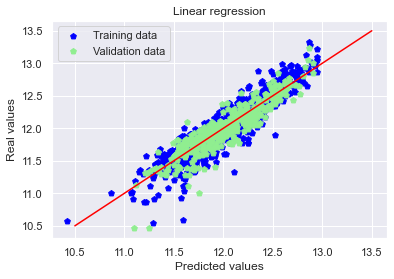

In [99]:
# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "p", label = "Training data")
plt.scatter(y_val_pred, y_val, c = "lightgreen", marker = "p", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [112]:
# Ridge 
#number_cat = X1.columns.difference(columns_categorical)

#X_number = X1[number_cat].fillna(X1[number_cat].median())
#X_number.info()

#X_train_rdg, X_val_rdg, y_train_rdg, y_val_rdg = train_test_split(X_number, y, test_size = 0.3, random_state = 0)

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train_rdg, y_train_rdg)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train_rdg, y_train_rdg)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge))
print("Ridge RMSE on Test set :", rmse_cv_val(ridge))
y_train_rdg_pred = ridge.predict(X_train)
y_val_rdg_pred = ridge.predict(X_val)


ValueError: could not convert string to float: 'RL'

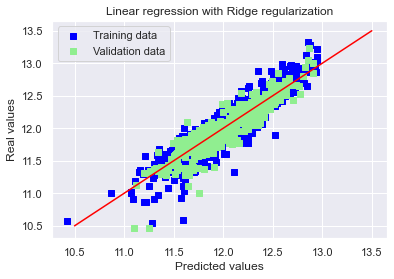

In [55]:
# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_val_rdg, y_val, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()



Ridge picked 11 features and eliminated the other 0 features


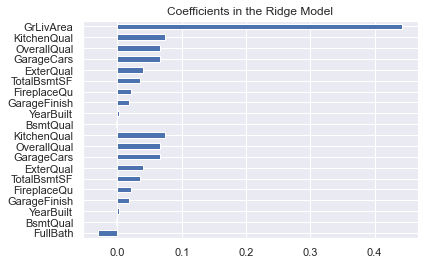

In [56]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()